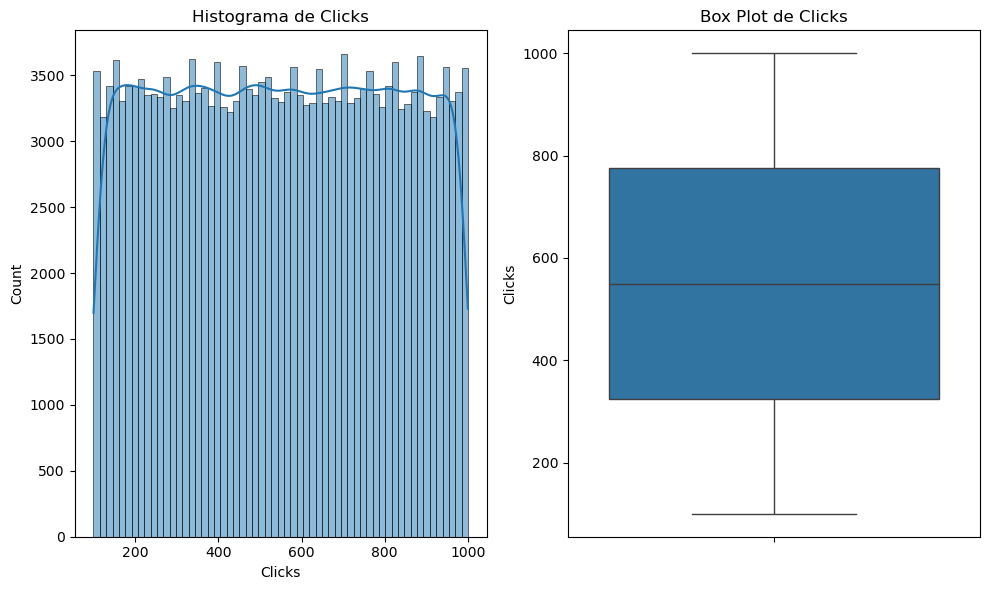

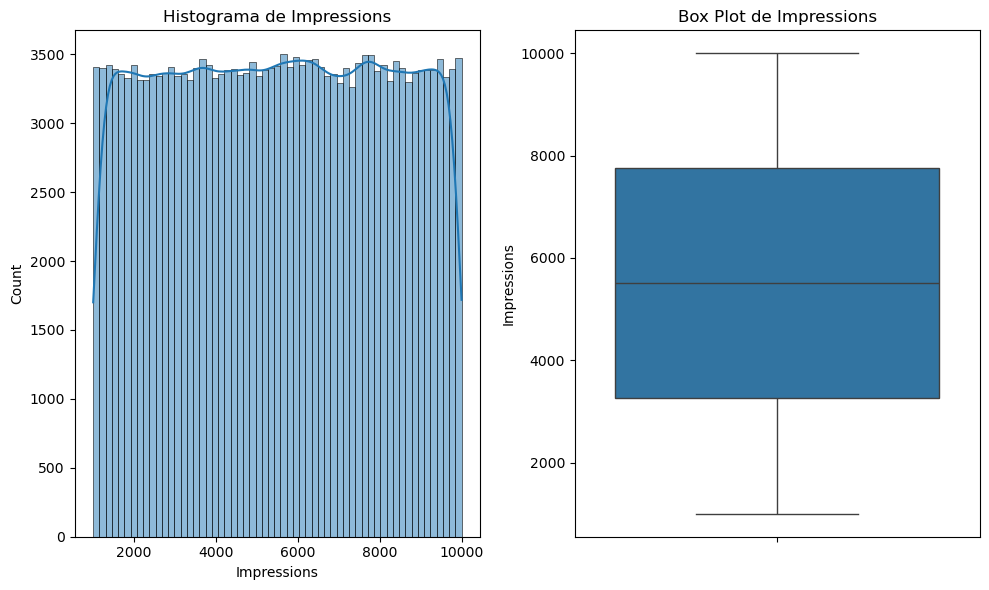

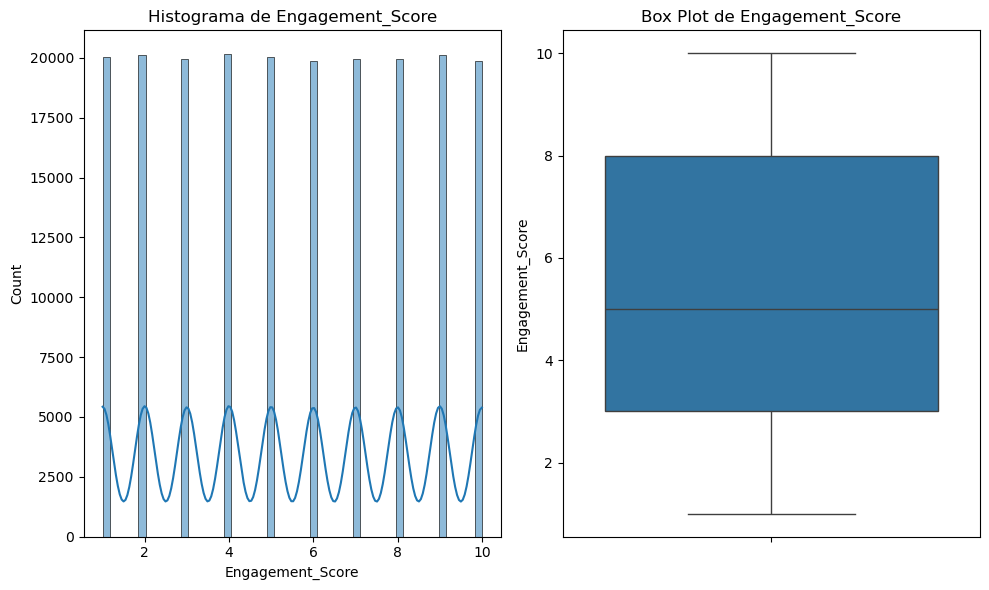

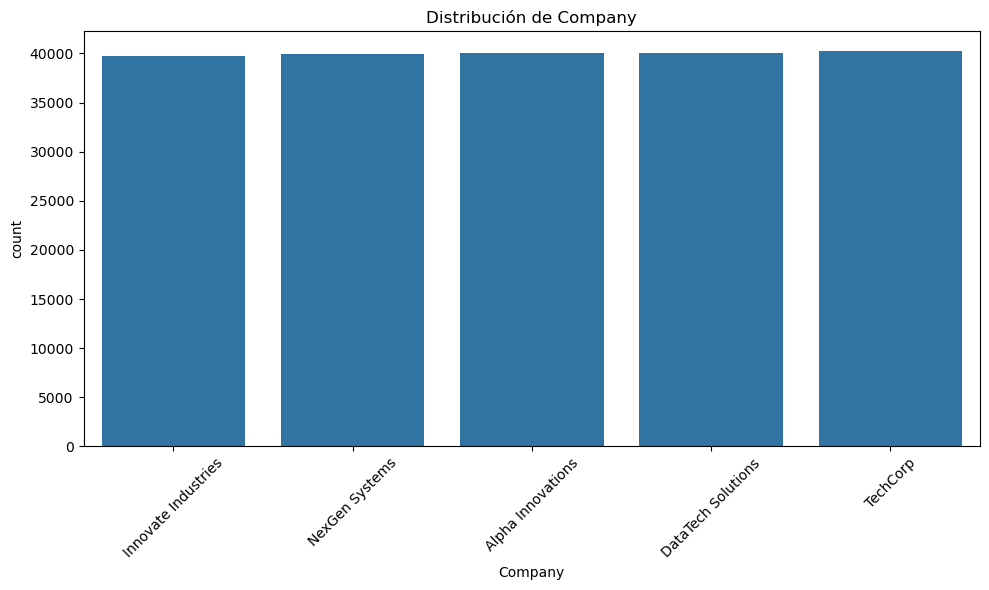

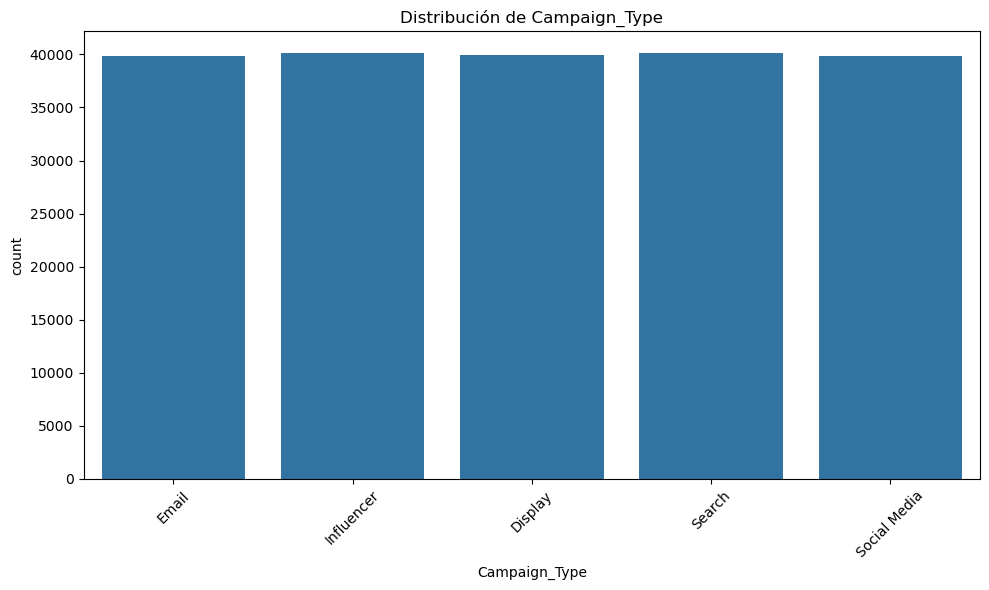

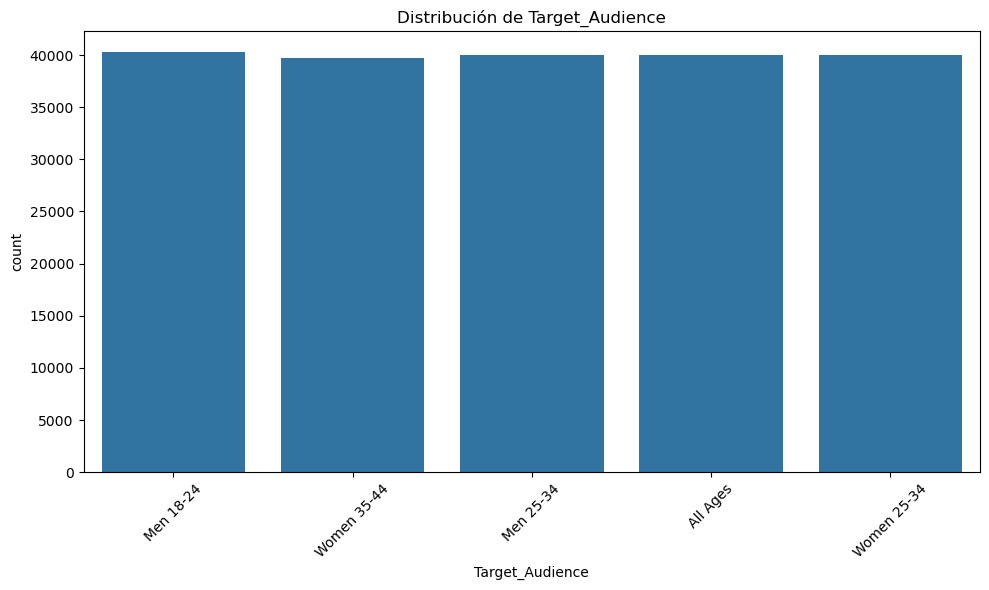

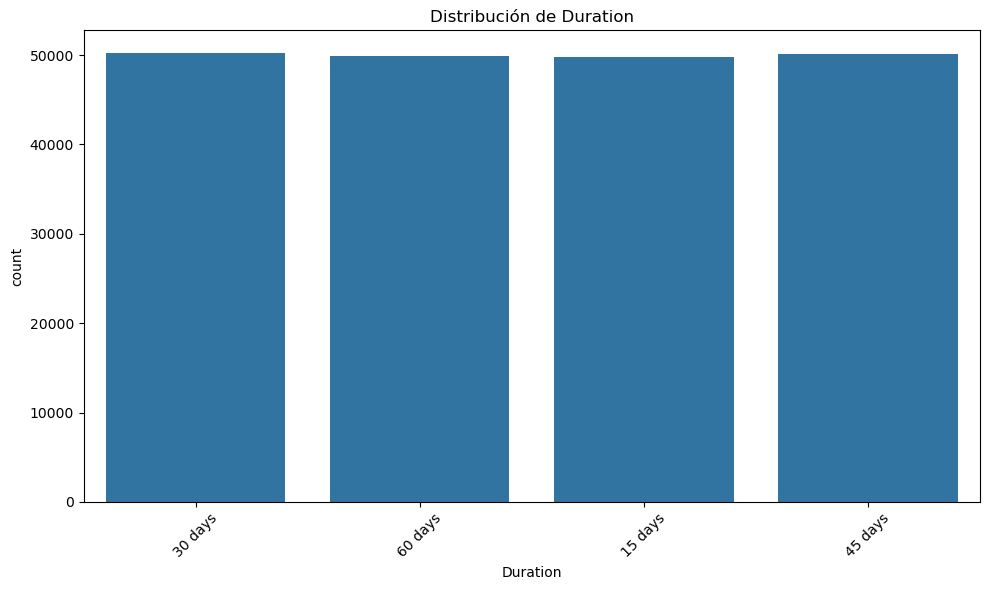

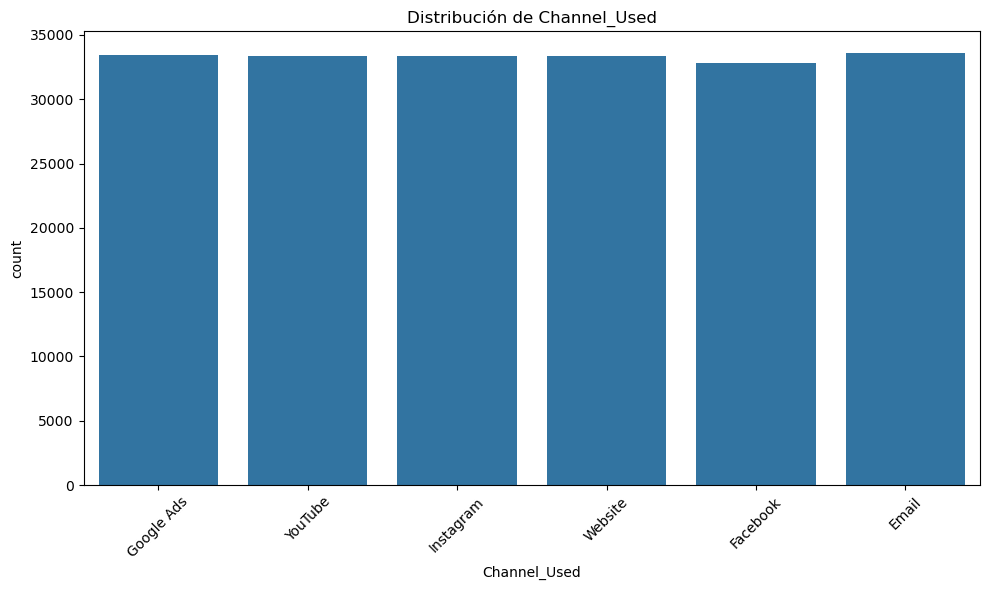

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
datos = pd.read_csv('campania_marketing_dataset.csv')

# 2. Análisis inicial de los datos
print("Primeras filas del dataset:")
print(datos.head())

print("\nInformación del dataset:")
print(datos.info())

print("\nEstadísticas descriptivas:")
print(datos.describe())

# 3. Análisis univariante
# Para variables numéricas
def analisis_numerico(datos):
    # Convertir las columnas a numéricas
    for columna in datos.columns:
        try:
            datos[columna] = pd.to_numeric(datos[columna])
        except ValueError:
            pass

    # Seleccionar las columnas numéricas
    numericas = datos.select_dtypes(include=[np.number]).columns

    for columna in numericas:
        plt.figure(figsize=(10, 6))
        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(datos[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=datos[columna])
        plt.title(f'Box Plot de {columna}')
        plt.tight_layout()
        plt.show()

# Para variables categóricas
def analisis_categorico(datos):
    categoricas = datos.select_dtypes(include=['object']).columns
    for columna in categoricas:
        plt.figure(figsize=(10, 6))
        # Gráfico de barras
        sns.countplot(data=datos, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 4. Análisis bivariante
def analisis_bivariante(datos):
    # Matriz de correlación para variables numéricas
    numericas = datos.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlación')
    plt.tight_layout()
    plt.show()
    
    # Para variables categóricas vs numéricas
    numericas = datos.select_dtypes(include=[np.number]).columns
    categoricas = datos.select_dtypes(include=['object']).columns
    
    for num in numericas:
        for cat in categoricas:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=datos, x=cat, y=num)
            plt.title(f'{cat} vs {num}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# 5. Análisis específico para el dataset de marketing
# Ejemplo: analizar la relación entre el tipo de campaña y el ROI
def analisis_marketing(datos):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=datos, x='Campaign_Type', y='ROI')
    plt.title('ROI por Tipo de Campaña')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Ejemplo: analizar la distribución de la tasa de conversión por ubicación
    plt.figure(figsize=(10, 6))
    sns.barplot(data=datos, x='Location', y='Conversion_Rate')
    plt.title('Tasa de Conversión por Ubicación')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. Ejecutar los análisis
print("\nIniciando análisis univariante...")
analisis_numerico(datos)
analisis_categorico(datos)

print("\nIniciando análisis bivariante...")
analisis_bivariante(datos)

print("\nIniciando análisis específico para el dataset de marketing...")
analisis_marketing(datos)

# 7. Verificar valores faltantes
print("\nValores faltantes por columna:")
print(datos.isnull().sum())

# 8. Guardar un resumen en un archivo
with open('resumen_eda.txt', 'w') as f:
    f.write("Resumen del Análisis Exploratorio de Datos\n")
    f.write("=========================================\n\n")
    f.write("Información del Dataset:\n")
    datos.info(buf=f)
    f.write("\n\nEstadísticas Descriptivas:\n")
    f.write(datos.describe().to_string())
    f.write("\n\nValores Faltantes:\n")
    f.write(datos.isnull().sum().to_string())